##Assignment No. 02
**Title:** Classification using Deep neural network.

Binary classification using Deep Neural Networks. Example:
Classify movie reviews into positive" reviews and "negative"
reviews, just based on the text content of the reviews. Use the IMDB dataset.


In [ ]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000) :
   results = np.zeros((len(sequences),dimension))
   for i , sequences in enumerate(sequences):
       results[i,sequences] = 1
   return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000 ,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 69ms/step - loss: 0.5482 - acc: 0.7627 - val_loss: 0.4273 - val_acc: 0.8593
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3489 - acc: 0.8929 - val_loss: 0.3322 - val_acc: 0.8807
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2621 - acc: 0.9155 - val_loss: 0.2921 - val_acc: 0.8866
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2092 - acc: 0.9325 - val_loss: 0.2784 - val_acc: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1761 - acc: 0.9456 - val_loss: 0.3449 - val_acc: 0.8614
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1519 - acc: 0.9521 - val_loss: 0.2830 - val_acc: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1316 - acc: 0.9593 - val_loss: 0.3001 - val_acc: 0.8817
Epoch 8/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1123 - a

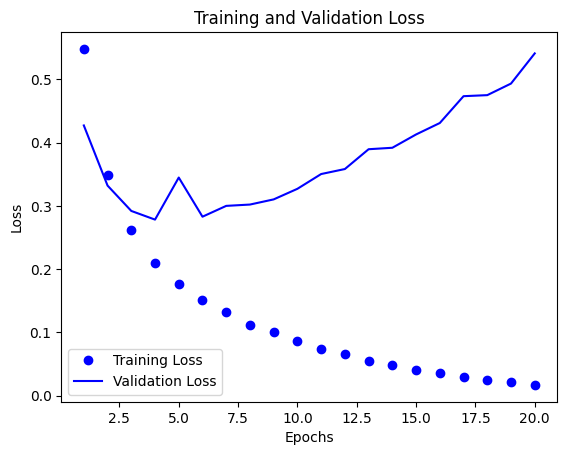

In [ ]:

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)  + 1)
plt.plot(epochs,loss_values,'bo', label='Training Loss')
plt.plot(epochs,val_loss_values,'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


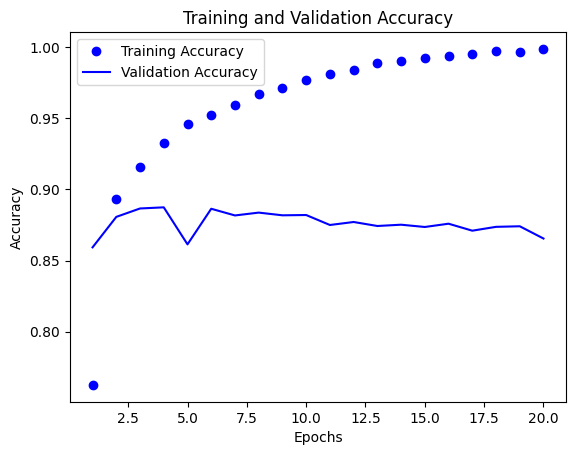

In [ ]:

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc_values,'bo', label='Training Accuracy')
plt.plot(epochs,val_acc_values,'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.00890043],
       [0.9999447 ],
       [0.32367182],
       ...,
       [0.0014117 ],
       [0.00843601],
       [0.72424096]], dtype=float32)

In [ ]:
binary_predicted_labels = (model.predict(x_test) > 0.5).astype("int32")
print(binary_predicted_labels)

782/782 [==============================] - 2s 2ms/step
